# **Alzheimer's Disease Prediction using ML models..!**

## 1.Oasis-Cross Sectional Dataset

In [5]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
# Step 2: Load the Dataset
df1 = pd.read_csv("oasis_cross-sectional.csv")
df1.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [7]:
df1.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000,20.00000
mean,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894,20.55000
std,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682,23.86249
min,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,1.00000
25%,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750,2.75000
50%,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000,11.00000
75%,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250,30.75000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000,89.00000


In [8]:
#Getting the Info of the Attributes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


In [9]:
#Dimension of the Dataset
df1.shape

(436, 12)

## Preprocessing

In [11]:
# Step 4: Check for Missing Values
print("\n Missing Values Count:")
print(df1.isnull().sum())


 Missing Values Count:
ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64


In [12]:
# Step 5: Drop rows with missing target (CDR) and unnecessary column (Delay)
df1 = df1.dropna(subset=["CDR"])  # Drop rows where CDR (target) is missing
df_cleaned = df1.drop(columns=["Delay"])  # Drop 'Delay' column

# Step 6: Handle Missing Values by Filling with Median (only features)
for col in ["Educ", "SES", "MMSE"]:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())


In [13]:
# Verify if missing values are handled
print("\n Missing Values After Imputation:")
print(df_cleaned.isnull().sum())


 Missing Values After Imputation:
ID      0
M/F     0
Hand    0
Age     0
Educ    0
SES     0
MMSE    0
CDR     0
eTIV    0
nWBV    0
ASF     0
dtype: int64


In [14]:
print(df_cleaned["Hand"].unique())

['R']


In [15]:
# Step 7: Convert Categorical Data to Numerical
df_cleaned["M/F"] = df_cleaned["M/F"].map({"M": 1, "F": 0})  # Male → 1, Female → 0

# Drop 'Hand' column (all values are the same)
df_cleaned.drop(columns=["Hand"], inplace=True)


In [16]:
df_cleaned.head(5)

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS1_0001_MR1,0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,OAS1_0002_MR1,0,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,OAS1_0003_MR1,0,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
8,OAS1_0010_MR1,1,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
9,OAS1_0011_MR1,0,52,3.0,2.0,30.0,0.0,1321,0.827,1.329


In [17]:
df_cleaned.shape

(235, 10)

C:\Users\LADE SAI TEJA\AppData\Local\Temp\ipykernel_13900\1487108865.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="CDR", data=df_cleaned, palette="pastel", order=sorted(df_cleaned["CDR"].unique()))


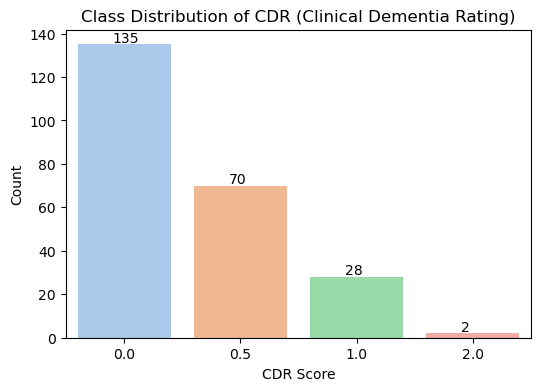

In [18]:
# Visualize the Target Variable (CDR)
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="CDR", data=df_cleaned, palette="pastel", order=sorted(df_cleaned["CDR"].unique()))

# Add title and labels
plt.title("Class Distribution of CDR (Clinical Dementia Rating)")
plt.xlabel("CDR Score")
plt.ylabel("Count")

# Annotate the count on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + 0.3, p.get_height() + 1))

# Show the plot
plt.show()


In [19]:
# Step 10: Define Features (X) & Binary Target Variable (y)
X = df_cleaned.drop(columns=["ID", "CDR"])  # Features
y = df_cleaned["CDR"].apply(lambda x: 0 if x == 0.0 else 1)  # Binary Target: 0 = Non-Dementia, 1 = Dementia

# Check class distribution
print("\nClass distribution of CDR:")
print(y.value_counts())

# Step 11: Standardize Numeric Features
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[['Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] = scaler.fit_transform(
    X[['Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
)

# Step 12: Split Data into Train & Test (80-20) with Stratified Sampling
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y  # Stratify to preserve class distribution
)


Class distribution of CDR:
CDR
0    135
1    100
Name: count, dtype: int64


In [20]:
X_scaled.head(5)

,M/F,Age,Educ,SES,MMSE,eTIV,nWBV,ASF
0,0,0.137193,-0.900671,0.508197,0.524850,-0.721742,-0.128273,0.692903
1,0,-1.437530,0.627544,-1.343374,0.524850,-1.952788,1.273290,2.435043
2,0,0.054313,0.627544,0.508197,-0.017303,-0.034356,-0.860432,-0.073639
8,1,0.137193,1.391651,-0.417588,0.795927,1.102956,-1.257890,-1.111181
9,0,-1.686170,-0.136564,-0.417588,0.795927,-0.865468,1.628910,0.870988


In [21]:
X_scaled.describe()

,M/F,Age,Educ,SES,MMSE,eTIV,nWBV,ASF
count,235.000000,2.350000e+02,2.350000e+02,2.350000e+02,2.350000e+02,2.350000e+02,2.350000e+02,2.350000e+02
mean,0.336170,1.965331e-16,7.558965e-18,4.535379e-17,2.267690e-16,-4.233021e-16,-1.294473e-15,1.436203e-16
std,0.473406,1.002134e+00,1.002134e+00,1.002134e+00,1.002134e+00,1.002134e+00,1.002134e+00,1.002134e+00
min,0.000000,-3.260893e+00,-1.664779e+00,-1.343374e+00,-3.541297e+00,-2.102763e+00,-2.199237e+00,-2.597808e+00
25%,0.000000,-5.258481e-01,-9.006713e-01,-4.175883e-01,-2.883792e-01,-6.967463e-01,-7.453782e-01,-6.427387e-01
50%,0.000000,5.431295e-02,-1.365639e-01,-4.175883e-01,5.248502e-01,-7.809877e-02,-4.459718e-02,-2.718234e-02
75%,1.000000,7.173542e-01,6.275436e-01,5.081971e-01,7.959266e-01,5.530467e-01,7.293998e-01,6.619311e-01
max,1.000000,1.960556e+00,1.391651e+00,2.359768e+00,7.959266e-01,3.327587e+00,2.047286e+00,2.682814e+00


## **1. Decision Tree ML model**

In [23]:
# Train Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\n Decision Tree Accuracy: {accuracy_dt:.2f}")
print("\n Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))



 Decision Tree Accuracy: 0.83

 Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.83      0.75      0.79        20

    accuracy                           0.83        47
   macro avg       0.83      0.82      0.82        47
weighted avg       0.83      0.83      0.83        47



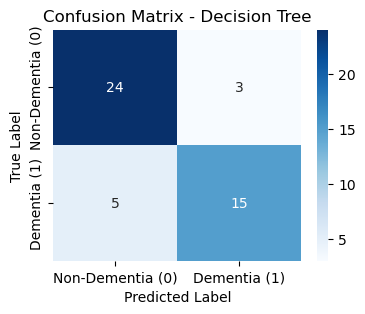

In [24]:
# Generate Confusion Matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plot & Save
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Dementia (0)", "Dementia (1)"],
            yticklabels=["Non-Dementia (0)", "Dementia (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
#plt.savefig("Decision_Tree_Confusion_Matrix.png")
plt.show()

### k-fold cross validation for DT

Cross-validation scores for Decision Tree: [0.80851064 0.74468085 0.78723404 0.78723404 0.76595745]
Mean cross-validation score: 0.778723404255319

Decision Tree Accuracy: 0.83

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.83      0.75      0.79        20

    accuracy                           0.83        47
   macro avg       0.83      0.82      0.82        47
weighted avg       0.83      0.83      0.83        47



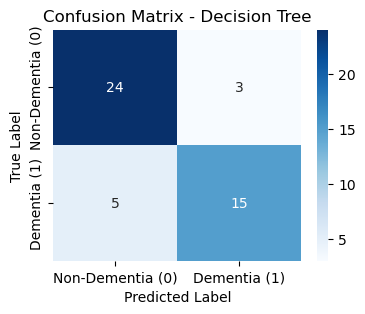

In [26]:
# Step 6: Cross-validation for Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Define the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Perform cross-validation (5 folds) to evaluate the model
cv_scores_dt = cross_val_score(dt_model, X_scaled, y, cv=5)

# Print cross-validation scores and the mean score
print(f"Cross-validation scores for Decision Tree: {cv_scores_dt}")
print(f"Mean cross-validation score: {cv_scores_dt.mean()}")

# Train the Decision Tree model on the full training data
dt_model.fit(X_train, y_train)

# Predict using the trained model
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nDecision Tree Accuracy: {accuracy_dt:.2f}")
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plot the Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Dementia (0)", "Dementia (1)"],
            yticklabels=["Non-Dementia (0)", "Dementia (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


In [27]:
print(f"Total samples in test set: {len(y_test)}")
print(f"Sum of matrix elements: {conf_matrix_dt.sum()}")


Total samples in test set: 47
Sum of matrix elements: 47


## **2. Support Vector Machine (SVM)**

Cross-validation scores for SVM: [0.76595745 0.76595745 0.87234043 0.78723404 0.82978723]
Mean cross-validation score: 0.8042553191489361
SVM Accuracy: 0.81

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.79      0.75      0.77        20

    accuracy                           0.81        47
   macro avg       0.81      0.80      0.80        47
weighted avg       0.81      0.81      0.81        47



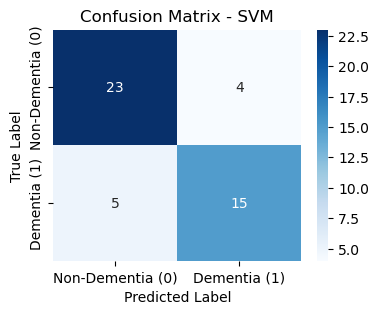

In [29]:
# Step 1: Cross-validation for SVM Model
from sklearn.model_selection import cross_val_score

# Define the SVM model
svm_model = SVC(kernel="linear", C=1.0, random_state=42)

# Perform cross-validation (5 folds) to evaluate the model
cv_scores_svm = cross_val_score(svm_model, X_scaled, y, cv=5)

# Print cross-validation scores and the mean score
print(f"Cross-validation scores for SVM: {cv_scores_svm}")
print(f"Mean cross-validation score: {cv_scores_svm.mean()}")

# Train the SVM model on the full training data
svm_model.fit(X_train, y_train)

# Predict using the trained model
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Dementia (0)", "Dementia (1)"],
            yticklabels=["Non-Dementia (0)", "Dementia (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()



## **3. Random forest ML model**


Random Forest Accuracy: 0.83

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86        27
           1       0.88      0.70      0.78        20

    accuracy                           0.83        47
   macro avg       0.84      0.81      0.82        47
weighted avg       0.84      0.83      0.83        47

Cross-validation scores for Random Forest: [0.86842105 0.84210526 0.81578947 0.78378378 0.78378378]
Mean cross-validation score: 0.8187766714082503


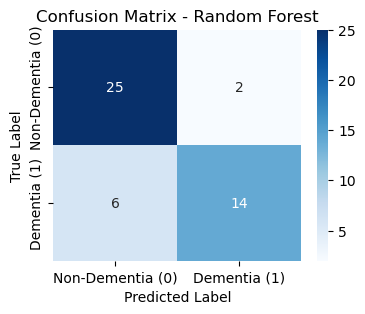

C:\Users\LADE SAI TEJA\AppData\Local\Temp\ipykernel_13900\3417041793.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_indices], y=features[sorted_indices], palette="crest")


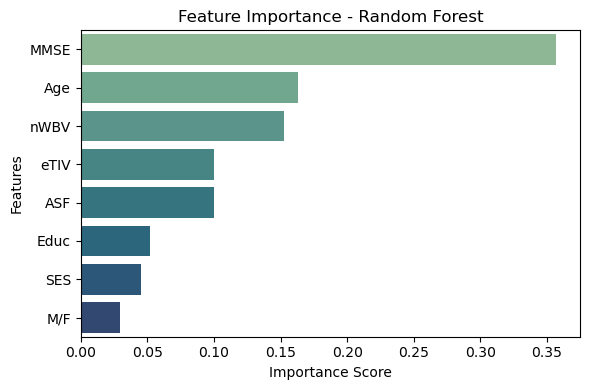

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Accuracy: {accuracy_rf:.2f}")
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Cross-Validation
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Cross-validation scores for Random Forest:", cv_scores_rf)
print("Mean cross-validation score:", cv_scores_rf.mean())

# Generate Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Dementia (0)", "Dementia (1)"],
            yticklabels=["Non-Dementia (0)", "Dementia (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Plot Feature Importances
importances = rf_model.feature_importances_
features = X_train.columns
sorted_indices = importances.argsort()[::-1]

plt.figure(figsize=(6, 4))
sns.barplot(x=importances[sorted_indices], y=features[sorted_indices], palette="crest")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


## **4. XG boost ML model**

C:\Users\LADE SAI TEJA\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:57:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.85

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.88      0.75      0.81        20

    accuracy                           0.85        47
   macro avg       0.86      0.84      0.84        47
weighted avg       0.85      0.85      0.85        47



C:\Users\LADE SAI TEJA\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:57:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\LADE SAI TEJA\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:57:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\LADE SAI TEJA\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:57:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\LADE SAI T

Cross-validation scores for XGBoost: [0.86842105 0.84210526 0.78947368 0.83783784 0.75675676]
Mean cross-validation score: 0.818918918918919


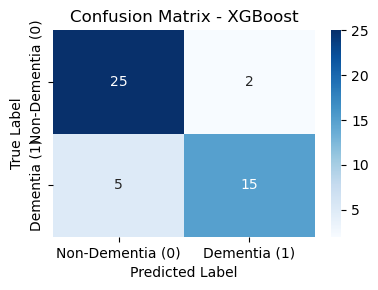

<Figure size 600x400 with 0 Axes>

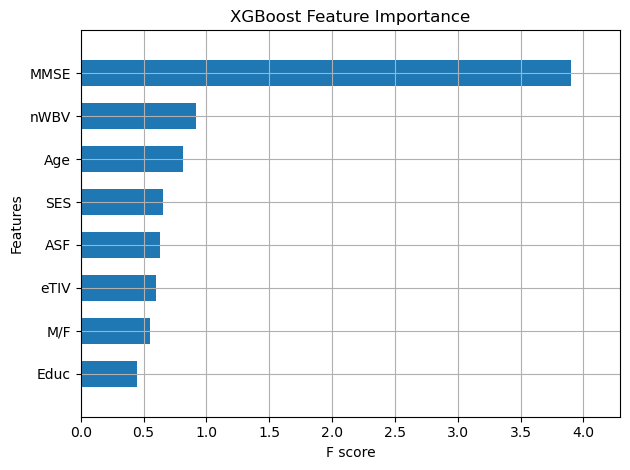

In [33]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Train XGBoost Model
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=7,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"\nXGBoost Accuracy: {accuracy_xgb:.2f}")
print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# Cross-Validation
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5)
print("Cross-validation scores for XGBoost:", cv_scores_xgb)
print("Mean cross-validation score:", cv_scores_xgb.mean())

# Generate Confusion Matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Dementia (0)", "Dementia (1)"],
            yticklabels=["Non-Dementia (0)", "Dementia (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.tight_layout()
plt.show()

# Plot Feature Importances
plt.figure(figsize=(6, 4))
xgb.plot_importance(xgb_model, importance_type='gain', height=0.6,
                    title='XGBoost Feature Importance', show_values=False)
plt.tight_layout()
plt.show()


## **5. Voting Classifier**

#### **5.1 Soft Voting Classifier**

C:\Users\LADE SAI TEJA\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:57:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Voting Classifier (Soft) Accuracy: 0.83

 Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86        27
           1       0.88      0.70      0.78        20

    accuracy                           0.83        47
   macro avg       0.84      0.81      0.82        47
weighted avg       0.84      0.83      0.83        47



C:\Users\LADE SAI TEJA\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:57:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\LADE SAI TEJA\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:57:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\LADE SAI TEJA\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:57:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\LADE SAI T


Cross-validation scores for Voting Classifier: [0.89473684 0.76315789 0.78947368 0.83783784 0.72972973]
Mean cross-validation score: 0.8029871977240399


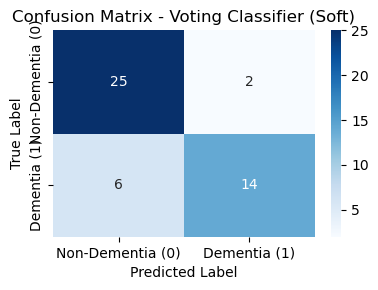

In [36]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

# Define SVM Model (with probability=True for soft voting)
svm_model = SVC(probability=True, random_state=42)

# Create the VotingClassifier (Soft Voting)
voting_clf = VotingClassifier(
    estimators=[
        ('dt', dt_model),  # Decision Tree
        ('rf', rf_model),  # Random Forest
        ('xgb', xgb_model),  # XGBoost
        ('svm', svm_model)  # Support Vector Machine
    ],
    voting='soft'  # Soft Voting uses predicted probabilities
)

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred_softvoting = voting_clf.predict(X_test)

# Evaluate Voting Classifier (Soft)
accuracy_soft = accuracy_score(y_test, y_pred_softvoting)
print(f"\n Voting Classifier (Soft) Accuracy: {accuracy_soft:.2f}")
print("\n Classification Report for Voting Classifier:")
print(classification_report(y_test, y_pred_softvoting))

# Cross-validation for Voting Classifier
cv_scores_soft = cross_val_score(voting_clf, X_train, y_train, cv=5)
print("\nCross-validation scores for Voting Classifier:", cv_scores_soft)
print("Mean cross-validation score:", cv_scores_soft.mean())

# Generate Confusion Matrix for Voting Classifier
conf_matrix_soft = confusion_matrix(y_test, y_pred_softvoting)

# Plot Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_soft, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Dementia (0)", "Dementia (1)"],
            yticklabels=["Non-Dementia (0)", "Dementia (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Voting Classifier (Soft)")
plt.tight_layout()
plt.show()


#### **5.2  Hard Voting Classifier**

C:\Users\LADE SAI TEJA\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:57:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Voting Classifier (Hard) Accuracy: 0.83

 Classification Report for Hard Voting Classifier:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86        27
           1       0.88      0.70      0.78        20

    accuracy                           0.83        47
   macro avg       0.84      0.81      0.82        47
weighted avg       0.84      0.83      0.83        47



C:\Users\LADE SAI TEJA\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:57:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\LADE SAI TEJA\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:57:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\LADE SAI TEJA\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:57:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\LADE SAI T


Cross-validation scores for Hard Voting Classifier: [0.89473684 0.78947368 0.78947368 0.81081081 0.78378378]
Mean cross-validation score: 0.8136557610241821


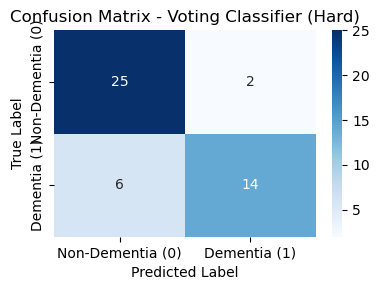

In [38]:
from sklearn.ensemble import VotingClassifier

# Create a new SVM without probability=True (not needed for hard voting)
svm_model_hard = SVC(random_state=42)

# Hard Voting Classifier
voting_clf_hard = VotingClassifier(
    estimators=[
        ('dt', dt_model),
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('svm', svm_model_hard)
    ],
    voting='hard'  # Hard voting based on majority class prediction
)

# Train the classifier
voting_clf_hard.fit(X_train, y_train)

# Predict
y_pred_hardvoting = voting_clf_hard.predict(X_test)

# Evaluate
accuracy_hard = accuracy_score(y_test, y_pred_hardvoting)
print(f"\n Voting Classifier (Hard) Accuracy: {accuracy_hard:.2f}")
print("\n Classification Report for Hard Voting Classifier:")
print(classification_report(y_test, y_pred_hardvoting))

# Cross-validation for Hard Voting Classifier
cv_scores_hard = cross_val_score(voting_clf_hard, X_train, y_train, cv=5)
print("\nCross-validation scores for Hard Voting Classifier:", cv_scores_hard)
print("Mean cross-validation score:", cv_scores_hard.mean())

# Confusion Matrix
conf_matrix_hard = confusion_matrix(y_test, y_pred_hardvoting)

# Plot
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_hard, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Dementia (0)", "Dementia (1)"],
            yticklabels=["Non-Dementia (0)", "Dementia (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Voting Classifier (Hard)")
plt.tight_layout()
plt.show()


In [39]:
print(f"\nSoft Voting Accuracy: {accuracy_soft:.2f}")
print(f"\nHard Voting Accuracy: {accuracy_hard:.2f}")


Soft Voting Accuracy: 0.83

Hard Voting Accuracy: 0.83


## **Comparing Decision Tree, SVM, Random Forest, XG Boost & Voting Classifier**

### **1. Accuracy**

C:\Users\LADE SAI TEJA\AppData\Local\Temp\ipykernel_13900\3047492445.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="pastel")


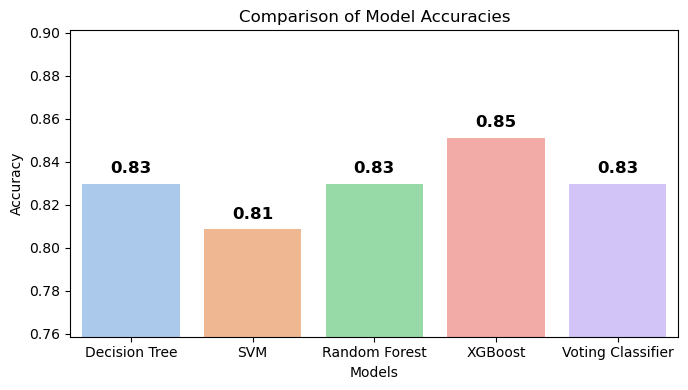

In [42]:
# Store Model Accuracies
models = ["Decision Tree", "SVM", "Random Forest", "XGBoost", "Voting Classifier"]
accuracies = [accuracy_dt, accuracy_svm, accuracy_rf, accuracy_xgb, accuracy_soft]

# Create Accuracy Comparison Plot
plt.figure(figsize=(7, 4))
sns.barplot(x=models, y=accuracies, palette="pastel")

# Add Accuracy Values on Top of Bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.2f}", ha="center", fontsize=12, fontweight="bold")

# Customize Plot
plt.ylim(min(accuracies) - 0.05, max(accuracies) + 0.05)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.tight_layout()
plt.savefig("All_models_accuracy_comparison.png")
plt.show()


### **2. Precision**

C:\Users\LADE SAI TEJA\AppData\Local\Temp\ipykernel_13900\1285056129.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=precision_scores, palette="pastel")


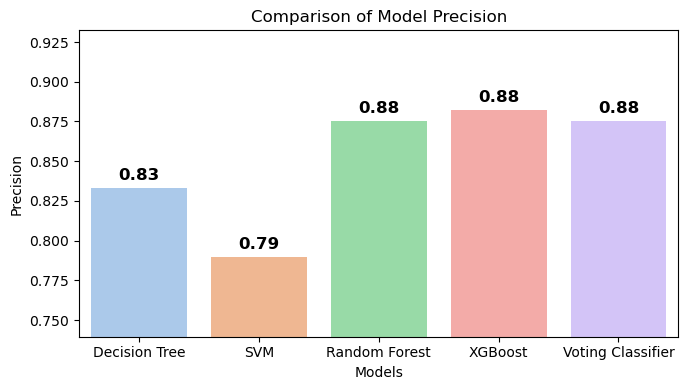

In [80]:
from sklearn.metrics import precision_score

# Calculate Precision for each model

# Decision Tree Precision
precision_dt = precision_score(y_test, y_pred_dt)

# SVM Precision
precision_svm = precision_score(y_test, y_pred_svm)

# Random Forest Precision
precision_rf = precision_score(y_test, y_pred_rf)

# XGBoost Precision
precision_xgb = precision_score(y_test, y_pred_xgb)

# Voting Classifier Precision (assuming 'y_pred_softvoting' is your prediction for the Voting Classifier)
precision_voting = precision_score(y_test, y_pred_softvoting)

# Store Model Precision Scores
precision_scores = [precision_dt, precision_svm, precision_rf, precision_xgb, precision_voting]

# Create Precision Comparison Plot
plt.figure(figsize=(7, 4))
sns.barplot(x=models, y=precision_scores, palette="pastel")

# Add Precision Values on Top of Bars
for i, precision in enumerate(precision_scores):
    plt.text(i, precision + 0.005, f"{precision:.2f}", ha="center", fontsize=12, fontweight="bold")

# Customize Plot
plt.ylim(min(precision_scores) - 0.05, max(precision_scores) + 0.05)
plt.xlabel("Models")
plt.ylabel("Precision")
plt.title("Comparison of Model Precision")
plt.tight_layout()
plt.savefig("All_models_precision_comparison.png")
plt.show()



### **3. Recall**

C:\Users\LADE SAI TEJA\AppData\Local\Temp\ipykernel_13900\1912379646.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=recall_scores, palette="pastel")


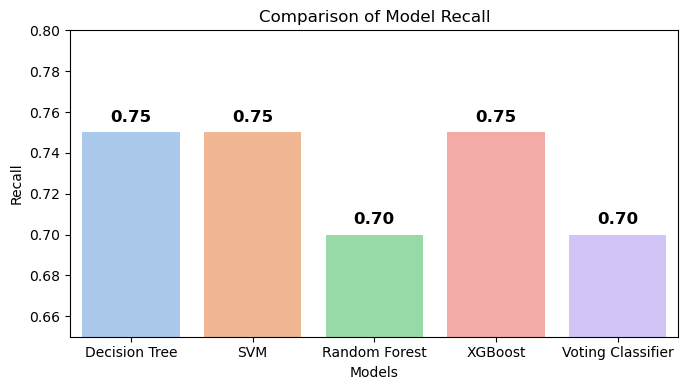

In [82]:
from sklearn.metrics import recall_score

# Calculate Recall for each model

# Decision Tree Recall
recall_dt = recall_score(y_test, y_pred_dt)

# SVM Recall
recall_svm = recall_score(y_test, y_pred_svm)

# Random Forest Recall
recall_rf = recall_score(y_test, y_pred_rf)

# XGBoost Recall
recall_xgb = recall_score(y_test, y_pred_xgb)

# Voting Classifier Recall (assuming 'y_pred_softvoting' is your prediction for the Voting Classifier)
recall_voting = recall_score(y_test, y_pred_softvoting)

# Store Model Recall Scores
recall_scores = [recall_dt, recall_svm, recall_rf, recall_xgb, recall_voting]

# Create Recall Comparison Plot
plt.figure(figsize=(7, 4))
sns.barplot(x=models, y=recall_scores, palette="pastel")

# Add Recall Values on Top of Bars
for i, recall in enumerate(recall_scores):
    plt.text(i, recall + 0.005, f"{recall:.2f}", ha="center", fontsize=12, fontweight="bold")

# Customize Plot
plt.ylim(min(recall_scores) - 0.05, max(recall_scores) + 0.05)
plt.xlabel("Models")
plt.ylabel("Recall")
plt.title("Comparison of Model Recall")
plt.tight_layout()
plt.savefig("All_models_recall_comparison.png")
plt.show()


### **4. F1-Score**

C:\Users\LADE SAI TEJA\AppData\Local\Temp\ipykernel_13900\1971388034.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=f1_scores, palette="pastel")


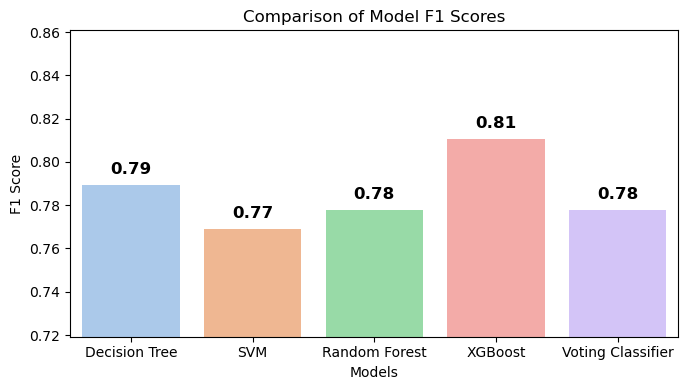

In [84]:
from sklearn.metrics import f1_score

# Calculate F1 Score for each model

# Decision Tree F1 Score
f1_dt = f1_score(y_test, y_pred_dt)

# SVM F1 Score
f1_svm = f1_score(y_test, y_pred_svm)

# Random Forest F1 Score
f1_rf = f1_score(y_test, y_pred_rf)

# XGBoost F1 Score
f1_xgb = f1_score(y_test, y_pred_xgb)

# Voting Classifier F1 Score (assuming 'y_pred_softvoting' is your prediction for the Voting Classifier)
f1_voting = f1_score(y_test, y_pred_softvoting)

# Store Model F1 Scores
f1_scores = [f1_dt, f1_svm, f1_rf, f1_xgb, f1_voting]

# Create F1 Score Comparison Plot
plt.figure(figsize=(7, 4))
sns.barplot(x=models, y=f1_scores, palette="pastel")

# Add F1 Score Values on Top of Bars
for i, f1 in enumerate(f1_scores):
    plt.text(i, f1 + 0.005, f"{f1:.2f}", ha="center", fontsize=12, fontweight="bold")

# Customize Plot
plt.ylim(min(f1_scores) - 0.05, max(f1_scores) + 0.05)
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("Comparison of Model F1 Scores")
plt.tight_layout()
plt.savefig("All_models_f1_score_comparison.png")
plt.show()


In [86]:
import joblib

# Replace `model` with the actual variable name of your model
joblib.dump(xgb_model, 'model.pkl')


['model.pkl']